In [108]:
import sys
import pylab
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pickle
import os
import csv
import random
np.random.seed(1)

## Обучение

In [109]:
def train_graph(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # инициализируем веса
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 15;
    snapshots = []
    
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            snapshots.append((np.copy(weights),(pos_correct+neg_correct)/2.0))

    return snapshots[-1][0]

In [110]:
with open('C:/Users/Igor/Desktop/NeuroWorkshop-master/Data/MNIST/mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

In [111]:
def set_mnist_pos_neg(positive_label):
    positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j == positive_label]
    negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j != positive_label]

    positive_images = MNIST['Train']['Features'][positive_indices]
    negative_images = MNIST['Train']['Features'][negative_indices]
    
    return positive_images, negative_images

In [112]:
# Для каждой цифры узнаем веса
snapshots = [train_graph(*(set_mnist_pos_neg(i)), 100) for i in range(10)]

In [113]:
# Вычисляет цифру с наибольшим выходным значением
def Guess(picture):
    probability = [float(np.dot(picture, snapshots[i])) for i in range(10)]
    return probability.index(max(probability))

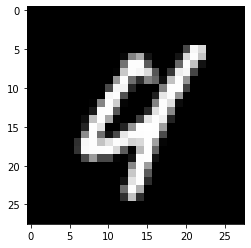

4

In [119]:
num_of_picture = random.randint(0, len(MNIST['Train']['Features']))

pylab.imshow(MNIST['Train']['Features'][num_of_picture].reshape(28,28), cmap='gray', interpolation='nearest')
pylab.show()

Guess(MNIST['Train']['Features'][num_of_picture])

## Тестирование

In [115]:
with open('C:/Users/Igor/Desktop/NeuroWorkshop-master/Data/MNIST/train.csv', newline='') as mnist_pickle:
    TEST = [i for i in list(csv.reader(mnist_pickle))]

In [116]:
LABELS = [int(i[0]) for i in TEST[1:]]
PICTURES = [np.array([int(j) for j in i[1:]]) for i in TEST[1:]]

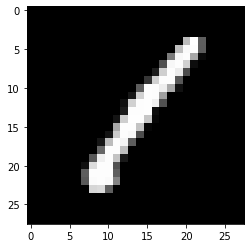

1


1

In [117]:
pylab.imshow(PICTURES[0].reshape(28,28), cmap='gray', interpolation='nearest')
pylab.show()
print(LABELS[0])

Guess(PICTURES[0])

In [118]:
pos = sum( LABELS[i] == Guess(PICTURES[i]) for i in range(len(LABELS)))
print(pos / len(LABELS))

0.7044761904761905


**Вывод:** Таким образом точность составляет порядка 70%